In [1]:
import numpy as np
from matplotlib import pyplot as plt

from regression.kernel_regression import KernelRegression

# set the style of the plot
plt.style.use('ggplot')

In [2]:
def generate_data(n_samples=100, n_features=2):
    np.random.seed(42)
    X_gen = np.random.randn(n_samples, n_features)
    y_gen = X_gen[:, 0] ** 2 + X_gen[:, 1] ** 3 + np.random.randn(n_samples)
    return X_gen, y_gen


def train_val_split(X_set, y_set, val_size=0.2):
    n_val = int(val_size * len(y_set))
    val_idx = np.random.choice(len(y_set), n_val, replace=False)
    train_idx = np.delete(np.arange(len(y_set)), val_idx)
    X_train_set, y_train_set = X_set[train_idx], y_set[train_idx]
    X_val_set, y_val_set = X_set[val_idx], y_set[val_idx]
    return X_train_set, y_train_set, X_val_set, y_val_set

In [3]:
X, y = generate_data(n_samples=10000, n_features=2)
X_train, y_train, X_val, y_val = train_val_split(X, y, val_size=0.2)

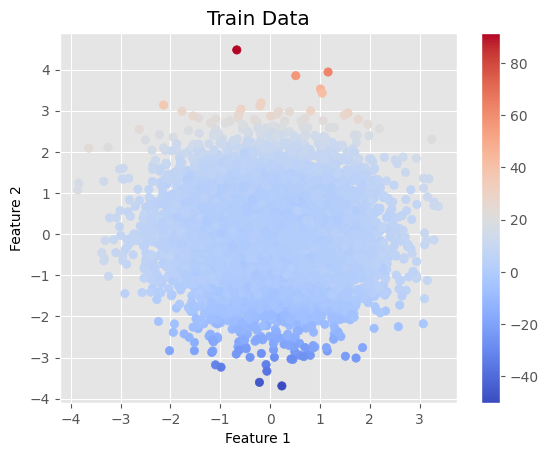

In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.colorbar()
plt.title('Train Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

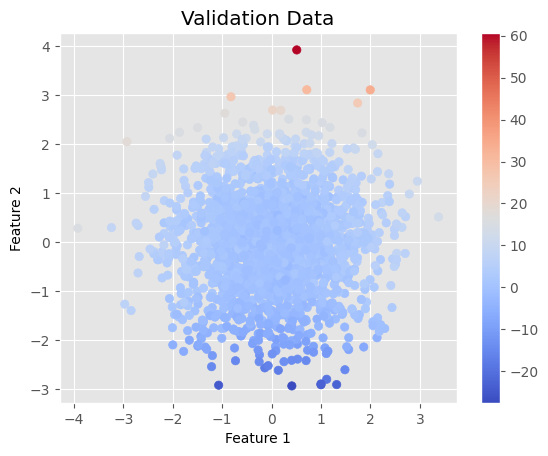

In [5]:
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='coolwarm')
plt.colorbar()
plt.title('Validation Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [6]:
# Init Regression
k = KernelRegression(X_train, y_train, X_val, y_val)

# Predict for validation
Y_pred_val = k.predict(X_val, sigma=0.05)

print("MSE: ", np.mean((np.sum((Y_pred_val - y_val.reshape(-1, 1))**2, axis=1))))

MSE:  1.1941737998062976


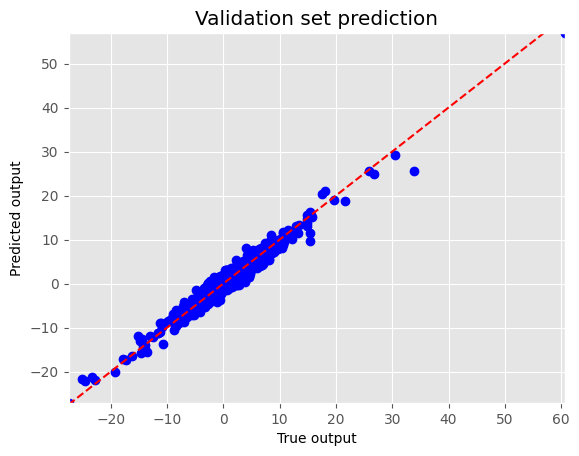

In [7]:
plt.plot(y_val, Y_pred_val, 'bo')
plt.plot([min([y_val.min(), Y_pred_val.min()]), max([y_val.max(), Y_pred_val.max()])],
         [min([y_val.min(), Y_pred_val.min()]), max([y_val.max(), Y_pred_val.max()])], 'r--')

plt.title('Validation set prediction')
plt.xlabel('True output')
plt.ylabel('Predicted output')
plt.axis([y_val.min(), y_val.max(), Y_pred_val.min(), Y_pred_val.max()])
plt.show()